In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_momentum_genie_all/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/genie_all/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_flux_momentum.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Flux variation, systematic

In [4]:
# Load input files
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"genie_other_systematic.root","RECREATE");


In [5]:
filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_data = 'NuCCana_data_V22.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     8.649e+18  # best with tor875
data_trigger = 1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
#pot_overlay= 1.22339196540357653e+21
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	33178
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.24025430537e+21
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0976176954382
Overlay:	0.00697356982562
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [7]:
if 1:
    filename_overlay = filename_overlay+'out33.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out33.root'
    filename_ext = filename_ext+'out33.root'
    filename_dirt = filename_dirt+'out33.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	33177
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40807



In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [12]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [13]:
'''variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_overlay_mom = ROOT.TH1F('h_overlay_mom','h_overlay_mom',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_mom',weight_name+'*('+cut+')')
h_overlay.Scale(globale.scale[globale.overlay])
bkg_dirt = h_dirt_mom.GetSumOfWeights()

print 'Overlay: ', num_data,
'''

"variable = 'TrackMomMCS_mom'\ncut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'\n\nh_overlay_mom = ROOT.TH1F('h_overlay_mom','h_overlay_mom',binnum,array('f',mom_bins))\nglobale.overlay_out.Draw(variable+'>>h_overlay_mom',weight_name+'*('+cut+')')\nh_overlay.Scale(globale.scale[globale.overlay])\nbkg_dirt = h_dirt_mom.GetSumOfWeights()\n\nprint 'Overlay: ', num_data,\n"

In [14]:
#weight_list = {}
'''weight_list_all = [ 'All_Genie', 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'TunedCentralValue_Genie',\
    'VecFFCCQEshape_Genie', 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation', 'splines_general_Spline' ]'''

#weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
#    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
#    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
#    'piplus_PrimaryHadronSWCentralSplineVariation' ]
weight_list_flux = [ 'All_Genie' ]
num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para
#weight_list_genie_other = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]

Nuber of parameters:  1


In [15]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 100
eff_uni = np.zeros((num_para,num_universes))
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [16]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/genie_all/root_output/'
f = ROOT.TFile.Open(path+"All_GenieGenie_systematic.root", 'read')
#h_data_mom = f.Get("h_data_mom")
#h_data_mom.Draw()
#c1.Draw()
#h_data_mom.GetEntries()

In [17]:

h_ext_mom = f.Get("h_ext_mom")
h_data_mom = f.Get("h_data_mom")
h_dirt_mom = f.Get("h_dirt_mom")

bkg_ext = h_ext_mom.GetSumOfWeights()
num_data = h_data_mom.GetSumOfWeights()
bkg_dirt = h_dirt_mom.GetSumOfWeights()

print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt


Data:  1445.0  Ext:  158.531139612  Dirt:  36.498739481


In [18]:

variable = 'MCle_Energy'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_1d = []
h_1d_true = []

for para in range(num_para):
    h_1d.append([])
    h_1d_true.append([])
    for uni in range(num_universes):
        h_1d[para].append(f.Get('h_1d['+str(para)+']['+str(uni)+']'))
        h_1d_true[para].append( f.Get('h_1d_true['+str(para)+']['+str(uni)+']' ))

for para in range(num_para): 
    print 'Get efficiency of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        #globale.overlay_out.Draw(variable+'>>h_1d['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*('+cut+'&& numu_signal)')
        #globale.overlay_out.Draw(variable+'>>h_1d_true['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*(numu_true)')
        num_signal = h_1d[para][uni].GetSumOfWeights()
        num_true = h_1d_true[para][uni].GetSumOfWeights()
        eff_uni[para][uni] = num_signal/(num_true+0.0001)
        #h_1d[para][uni].Write('h_1d['+str(para)+']['+str(uni)+']')
        #h_1d_true[para][uni].Write('h_1d_true['+str(para)+']['+str(uni)+']')
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' number of signal: ', num_signal,' True: ', num_true,' Eff: ',eff_uni[para][uni]
# save the efficiencies
#np.save(output_filedir+'xsec_flux_tot_efficiencies',eff_uni)
print 'Total std of efficiency (all parameters, all universes)',eff_uni.std()

Get efficiency of Parameter:  All_Genie
Total std of efficiency (all parameters, all universes) 0.005122198598117699


In [19]:
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

bkg_uni = np.zeros((num_para,num_universes))
h_1d_bkg = []
for para in range(num_para):
    h_1d_bkg.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_bkg[para].append( f.Get('h_1d_bkg['+str(para)+']['+str(uni)+']') )

for para in range(num_para):
    print 'Get background of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        #globale.overlay_out.Draw(variable+'>>h_1d_bkg['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*('+cut+'&& !numu_signal)')
        #h_1d_bkg[para][uni].Scale(globale.scale[globale.overlay])
        bkg_uni[para][uni] = h_1d_bkg[para][uni].GetSumOfWeights()
        #h_1d_bkg[para][uni].Write('h_1d_bkg['+str(para)+']['+str(uni)+']')
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Overlay: ',bkg_uni[para][uni]


Get background of Parameter:  All_Genie


In [20]:
xsec_uni = np.zeros((num_para,num_universes))
       
xsec_std = np.zeros((num_para))
xsec_mean = np.zeros((num_para))
xsec_diff = np.zeros((num_para))
xsec_CV = 7.6770041506e-39
xsec_diff_tot = 0

for para in range(num_para):
    for uni in range(num_universes):
        signal = num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni]
        xsec_uni[para][uni] = (num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni])/(eff_uni[para][uni] * N_tot * beam_flux)
        #globale.overlay_out.Draw(variable+">>h_1d_bkg["+str(uni)+']',weight_name+'*All_Genie['+str(uni)+']*('+cut+'&& !numu_signal)')
        #h_1d_xsec[uni].Scale(globale.scale[globale.overlay])
        #xsec_uni[uni] = h_1d_bkg[uni].GetSumOfWeights()
        print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Total fulux integrated xsec: ',xsec_uni[para][uni]
    xsec_std[para] = np.std(xsec_uni[para])
    xsec_mean[para] = np.mean(xsec_uni[para])
    xsec_diff[para] = xsec_std[para]*100.0/xsec_CV
    #print 'Parameter: %45s'% weight_list_flux[para], ' mean: {0:0.3e}%'.format(xsec_mean[para]), ' standart deviation: {0:0.3e}%'.format(xsec_std[para]),' in percent: {0:0.3f}%'.format(xsec_diff[para],'%')
    xsec_diff_tot = xsec_diff_tot + xsec_diff[para]*xsec_diff[para]
    
xsec_diff_tot = math.sqrt(xsec_diff_tot)
print 'Total flux errorin percent: {0:0.5f}%'.format(xsec_diff_tot,'%')

Parameter:  All_Genie  Universe:  0  Total fulux integrated xsec:  7.678094346449969e-39
Parameter:  All_Genie  Universe:  1  Total fulux integrated xsec:  7.806082365573153e-39
Parameter:  All_Genie  Universe:  2  Total fulux integrated xsec:  7.71112574684897e-39
Parameter:  All_Genie  Universe:  3  Total fulux integrated xsec:  7.764643578847081e-39
Parameter:  All_Genie  Universe:  4  Total fulux integrated xsec:  7.92419947555397e-39
Parameter:  All_Genie  Universe:  5  Total fulux integrated xsec:  7.99055142009711e-39
Parameter:  All_Genie  Universe:  6  Total fulux integrated xsec:  7.699358624620502e-39
Parameter:  All_Genie  Universe:  7  Total fulux integrated xsec:  8.009093334177922e-39
Parameter:  All_Genie  Universe:  8  Total fulux integrated xsec:  8.046812712502254e-39
Parameter:  All_Genie  Universe:  9  Total fulux integrated xsec:  7.247396406154828e-39
Parameter:  All_Genie  Universe:  10  Total fulux integrated xsec:  7.783763203529438e-39
Parameter:  All_Genie  

In [21]:
# check standard deviations on the true efficiency
np.std(eff_uni)
#Since the efficiency does not change very much per universe the nominal efficiency e_tilde is used
# in order not to calculated the whole detector smearing again
eff_tilde = np.load(input_filedir+'eff_tilde_momentum_xsec_CV.npy')
print input_filedir
print eff_tilde

/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/
[0.20982139 0.34924993 0.45501729 0.53793668 0.61080753 0.63447142
 0.58437668]


In [22]:

for para in range(num_para):
    xsec_uni_bin = np.zeros((num_universes,binnum))
    #print para
    for uni in range(num_universes):
        #print uni
        for i in range(binnum):
            xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)
            xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(eff_tilde[i] * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))
    #print xsec_uni_bin
        #if xsec_uni_bin[uni][i] == 0:
        #    print 

    xsec_std_bin = np.std(xsec_uni_bin,axis=0)
    #print xsec_uni_bin
    np.save(output_filedir+'xsec_'+weight_list_flux[para]+'_momentum',xsec_std_bin)

In [23]:
# save the total difference in percent
np.save(output_filedir+'xsec_percent_diff_momentum',xsec_std_bin)

In [24]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [25]:
# load CV values
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_files/'
f_cv = ROOT.TFile.Open(path+"xsec_momentum_wighted.root", 'read')
h_overlay_cv = ROOT.TH1F('h_overlay_cv',"xsec momentum",binnum,array('f',mom_bins))
h_overlay_cv = f_cv.Get("h_overlay")
h_cv =  h_data_mom.Clone()
h_cv.Add(h_ext_mom,-1)
h_cv.Add(h_dirt_mom,-1)
h_cv.Add(h_overlay_cv,-1)
h_cv.Scale(1.0/(N_tot * beam_flux ))
h_cv.SetLineColor(1)
for i in range(1,binnum+1):
    value = h_cv.GetBinContent(i)
    width = h_cv.GetBinWidth(i)
    h_cv.SetBinContent(i,value/(width*eff_tilde[i-1]))
    
h_cv.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_cv.SetXTitle("p_{\mu} \quad [GeV]")
#h_cv.SetMaximum(h_1d_xsec[0][0].GetMaximum()*1.1)
h_cv.SetMinimum(0)

In [26]:
h_1d_xsec = []
print num_universes
for para in range(num_para):
    h_1d_xsec.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_xsec[para].append( ROOT.TH1F('h_1d_xsec['+str(para)+']['+str(uni)+']',"xsec momentum",binnum,array('f',mom_bins)) )

for para in range(num_para):#num_para
    for uni in range(num_universes):    #num_universes 
        #xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)
        #xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(eff_tilde[i] * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))
        h_1d_xsec[para][uni] = h_data_mom.Clone()
        h_1d_xsec[para][uni].Add(h_ext_mom,-1)
        h_1d_xsec[para][uni].Add(h_dirt_mom,-1)
        h_1d_xsec[para][uni].Add(h_1d_bkg[para][uni],-1)
        h_1d_xsec[para][uni].Scale(1.0/(N_tot * beam_flux ))
        h_1d_xsec[para][uni].SetLineColor(para+2)
        h_1d_xsec[para][uni].SetLineWidth(3)
        for i in range(1,binnum+1):
            value = h_1d_xsec[para][uni].GetBinContent(i)
            width = h_1d_xsec[para][uni].GetBinWidth(i)
            h_1d_xsec[para][uni].SetBinContent(i,value/(width*eff_tilde[i-1]))
            #if i == 2:
            #print value/width, value, width
        

100


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//png/h_1d_xsec_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//root/h_1d_xsec_all.root has been created


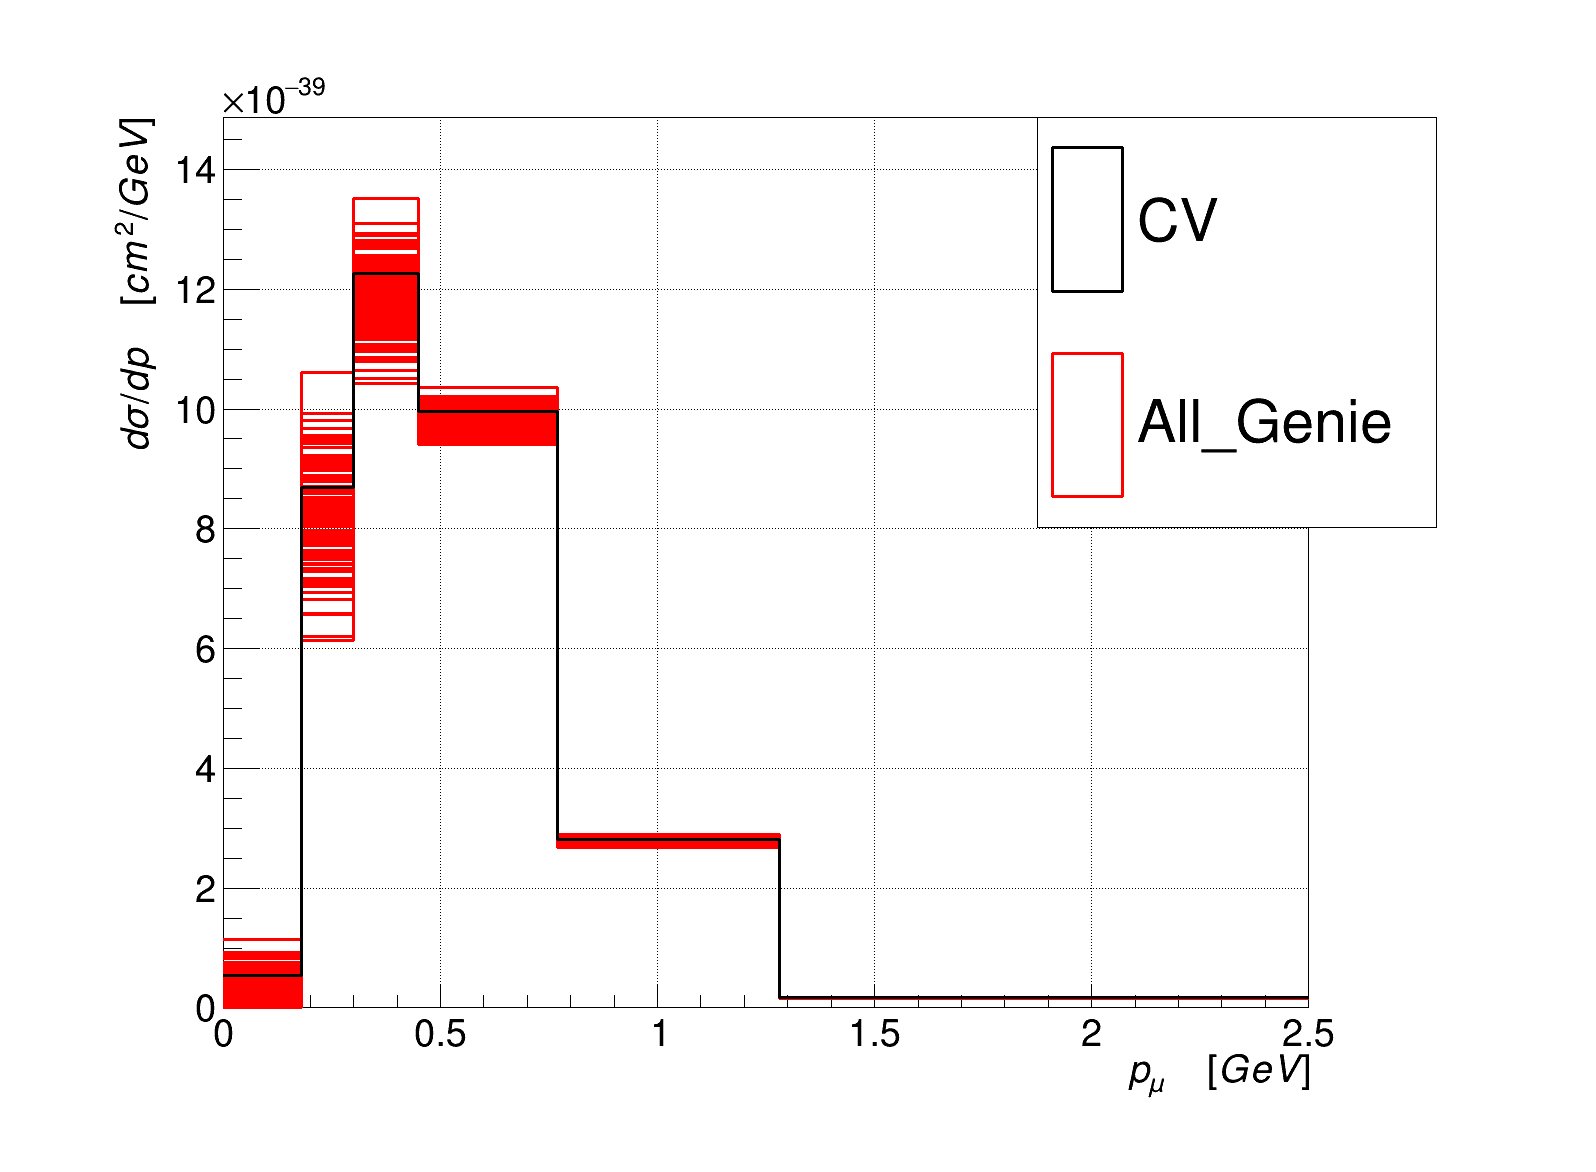

In [27]:
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_cv,'CV',"f")
h_cv.SetLineWidth(3)
max_entry = h_cv.GetMaximum()
for para in range(num_para):
    for uni in range(num_universes):        
        max_ = h_1d_xsec[para][uni].GetMaximum()
        if max_ > max_entry:
            max_entry = max_
h_cv.SetMaximum(max_entry*1.1)
h_cv.Draw('HIST')
max_entry = h_cv.GetMaximum()
for para in range(num_para):
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
    for uni in range(num_universes):  
        h_1d_xsec[para][uni].Draw('HIST same ')
        #max_ = h_1d_xsec[para][uni].GetMaximum()
        #if max_ > max_entry:
        #    max_entry = max_
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
legend.Draw()
h_cv.Draw('HIST same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_all.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_all.root")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//png/h_1d_bkg_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//root/h_1d_bkg_ll.root has been created


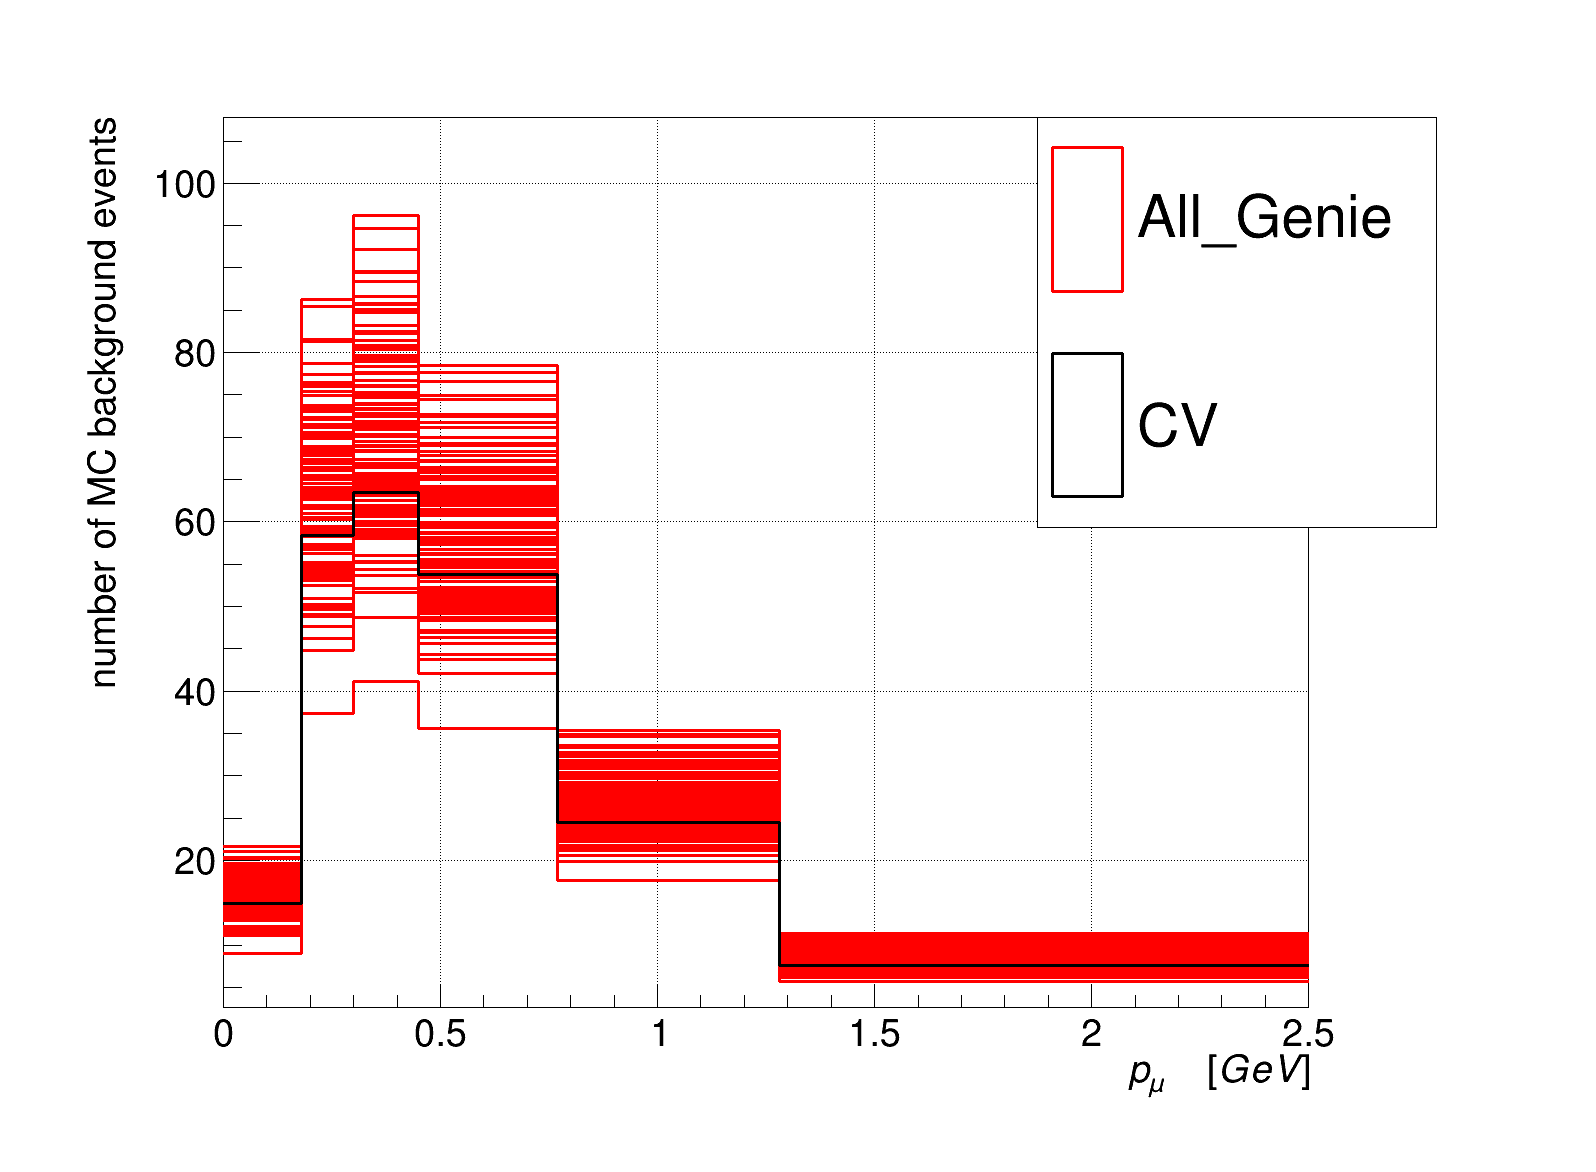

In [28]:
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
h_overlay_cv.SetLineWidth(3)
h_overlay_cv.SetLineColor(1)
h_overlay_cv.SetYTitle("number of MC background events")
h_overlay_cv.SetXTitle("p_{\mu} \quad [GeV]")
h_overlay_cv.SetMaximum(h_overlay_cv.GetMaximum()*1.7)
h_overlay_cv.Draw('HIST')
for para in range(num_para):
    for uni in range(num_universes):   
        h_1d_bkg[para][uni].SetLineColor(para+2)
        h_1d_bkg[para][uni].SetLineWidth(3)
        h_1d_bkg[para][uni].Draw('HIST same')
    legend.AddEntry(h_1d_bkg[para][uni],weight_list_flux[para],"f")
legend.AddEntry(h_overlay_cv,'CV',"f")        
legend.Draw()
h_overlay_cv.Draw('HIST same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_bkg_all.png")
c1.SaveAs(outputdir_root + "h_1d_bkg_ll.root")

In [29]:
xsec_cov_matrix = np.zeros((binnum,binnum)) # covariance matrix
xsec_corr_matrix = np.zeros((binnum,binnum)) # correlation matrix
xsec_frac_cov_matrix = np.zeros((binnum,binnum)) # fractional covariance matrix

for para in range(num_para):#num_para
    for uni in range(num_universes):    #num_universes 
        xsec_diff_matrix = np.zeros((binnum))
        xsec_diff_matrix_1 = np.zeros((binnum))
        for i in range(1,binnum+1):
            xsec_var = h_1d_xsec[para][uni].GetBinContent(i)
            xsec_cv = h_cv.GetBinContent(i)
            xsec_diff_matrix[i-1] = xsec_var - xsec_cv
            xsec_diff_matrix_1[i-1] = (xsec_var - xsec_cv)/(xsec_cv+1e-80)
        xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(binnum,1) * xsec_diff_matrix
        xsec_frac_cov_matrix = xsec_frac_cov_matrix + xsec_diff_matrix_1.reshape(binnum,1) * xsec_diff_matrix_1
for i in range(binnum):
    for j in range(binnum):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))
    

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//png/h_covariance_genie_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//root/h_covariance_genie_all.root has been created


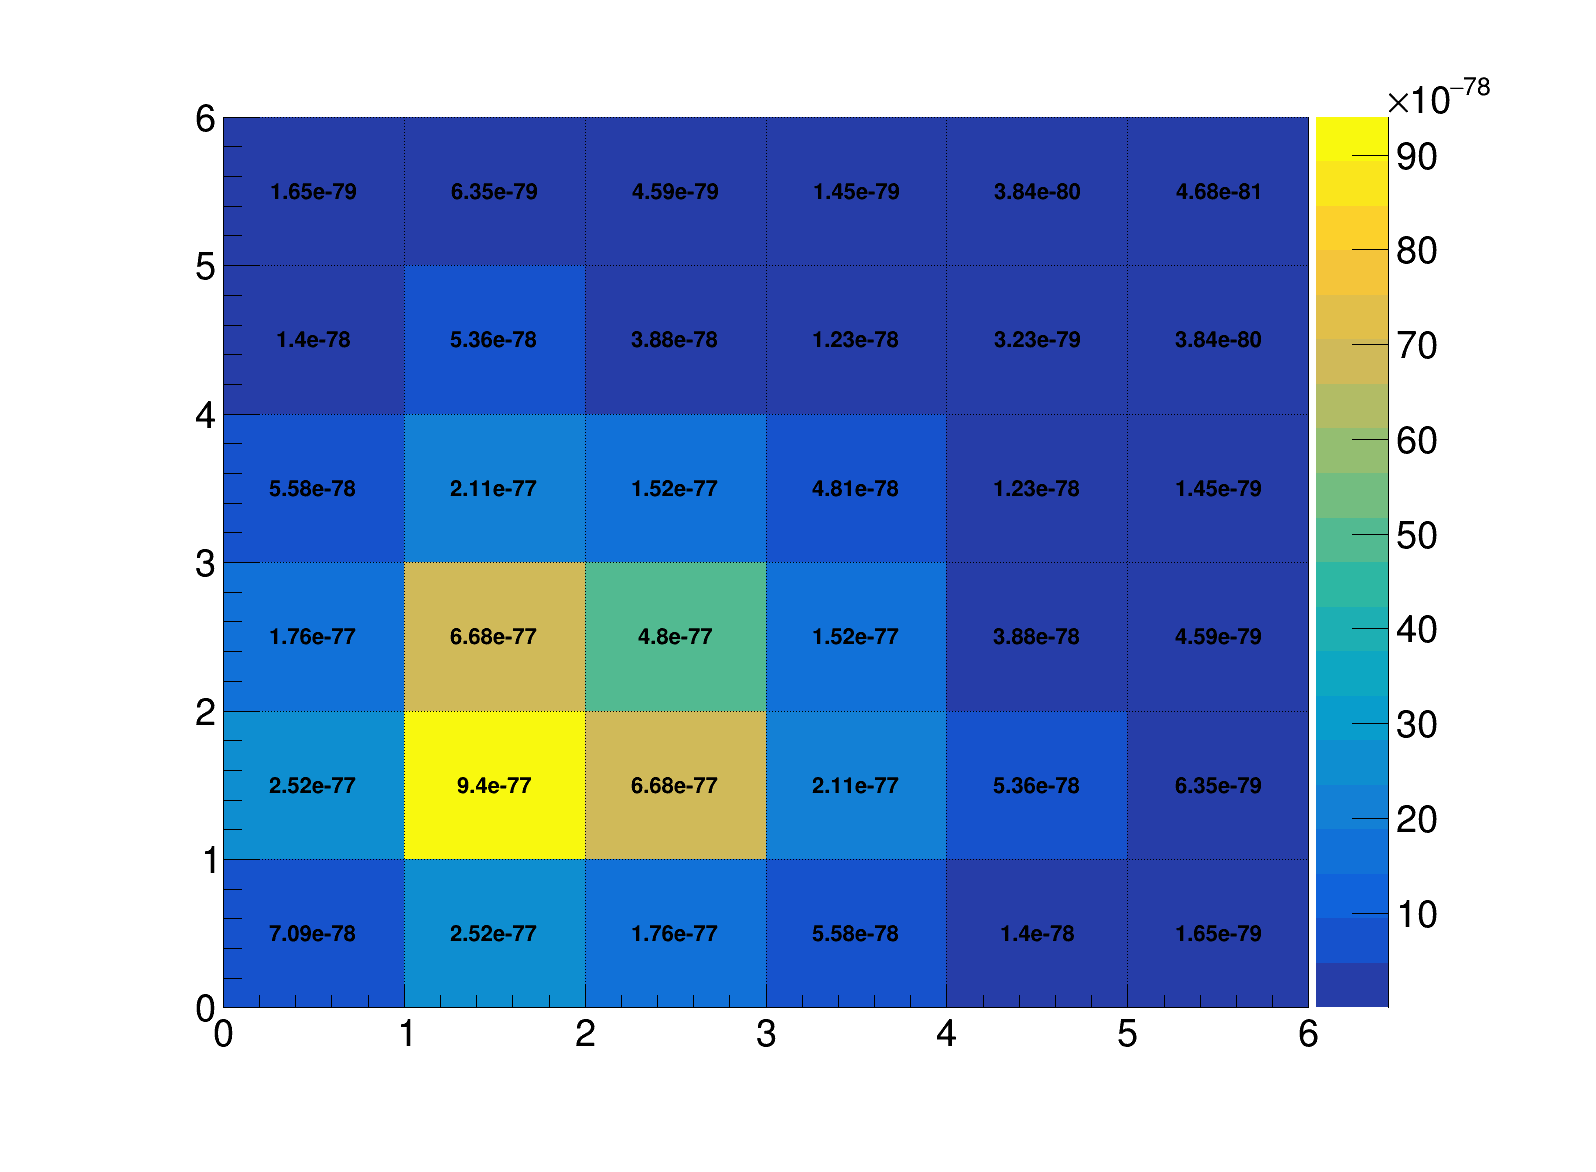

In [30]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.Draw('colz')
h_covariance.Draw('same text')
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_genie_all.png")
c1.SaveAs(outputdir_root + "h_covariance_genie_all.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//png/h_frac_covariance_genie_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//root/h_frac_covariance_genie_all.root has been created


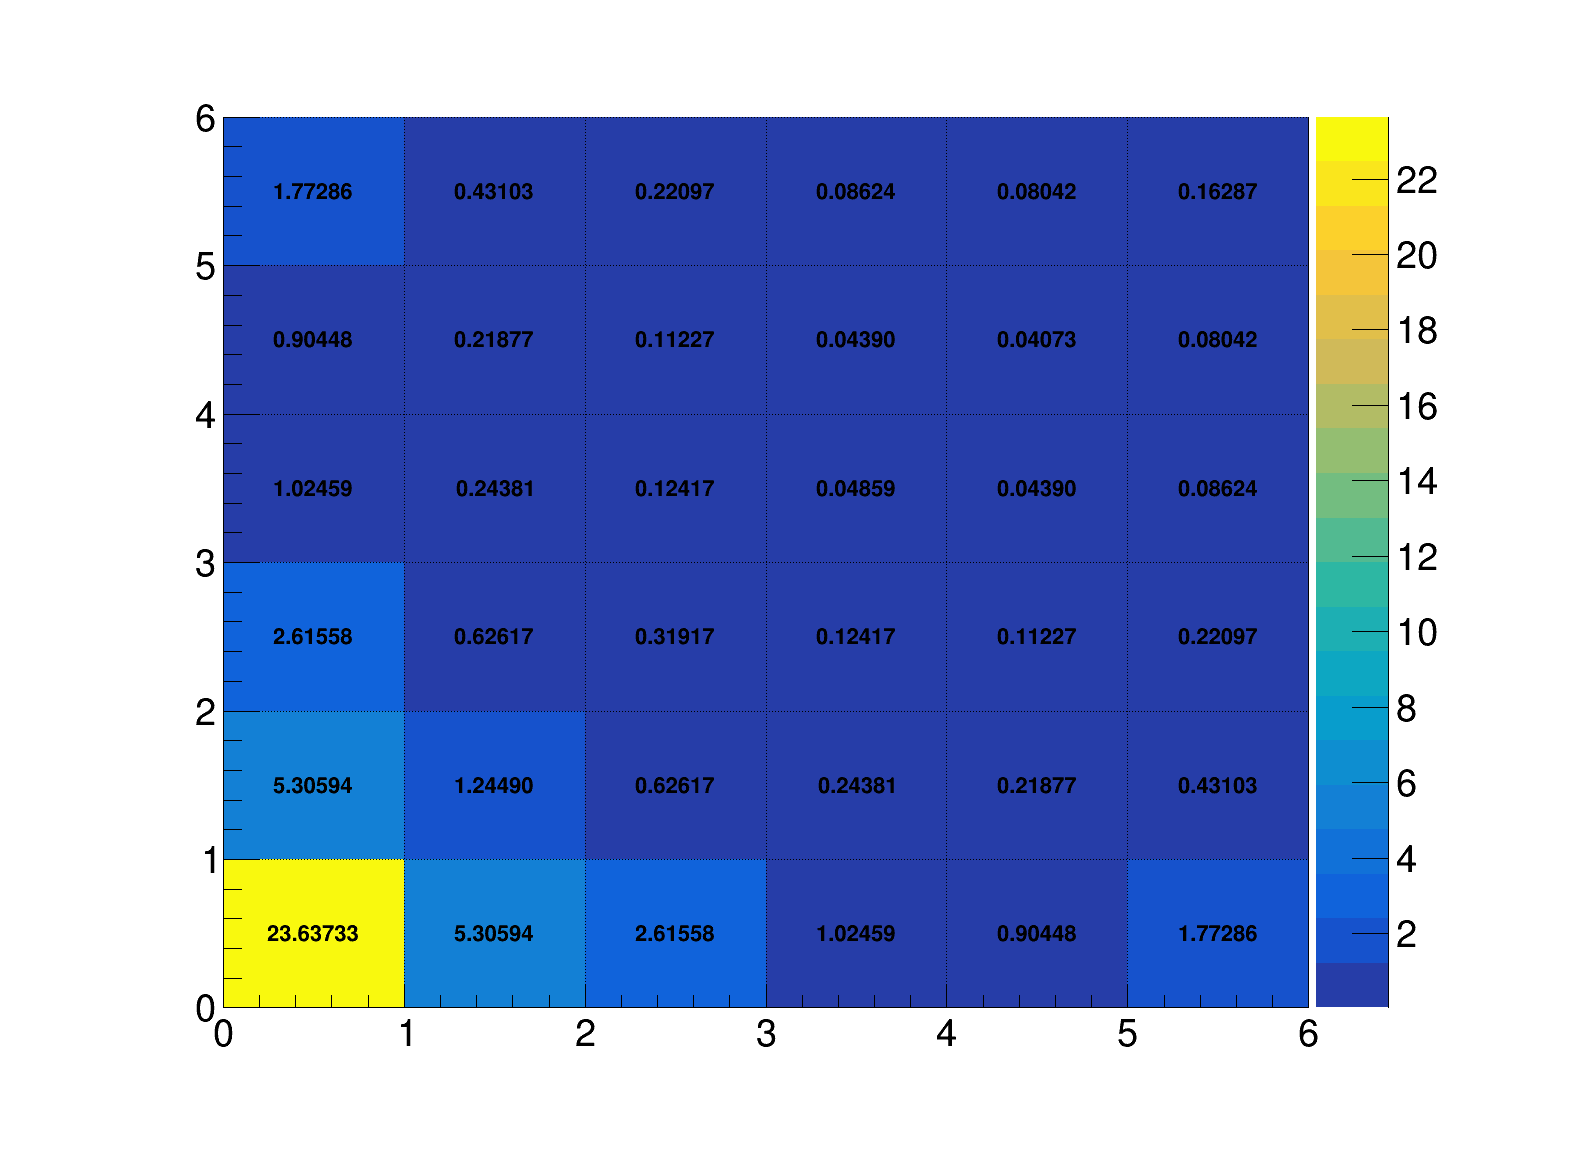

In [31]:
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_frac_covariance = ROOT.TH2D("h_frac_covariance",'Fractional covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_frac_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.Draw('colz')
h_covariance.Draw('same text')
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_genie_all.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_genie_all.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//png/h_correlation_genie_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_all//root/h_correlation_genie_all.root has been created


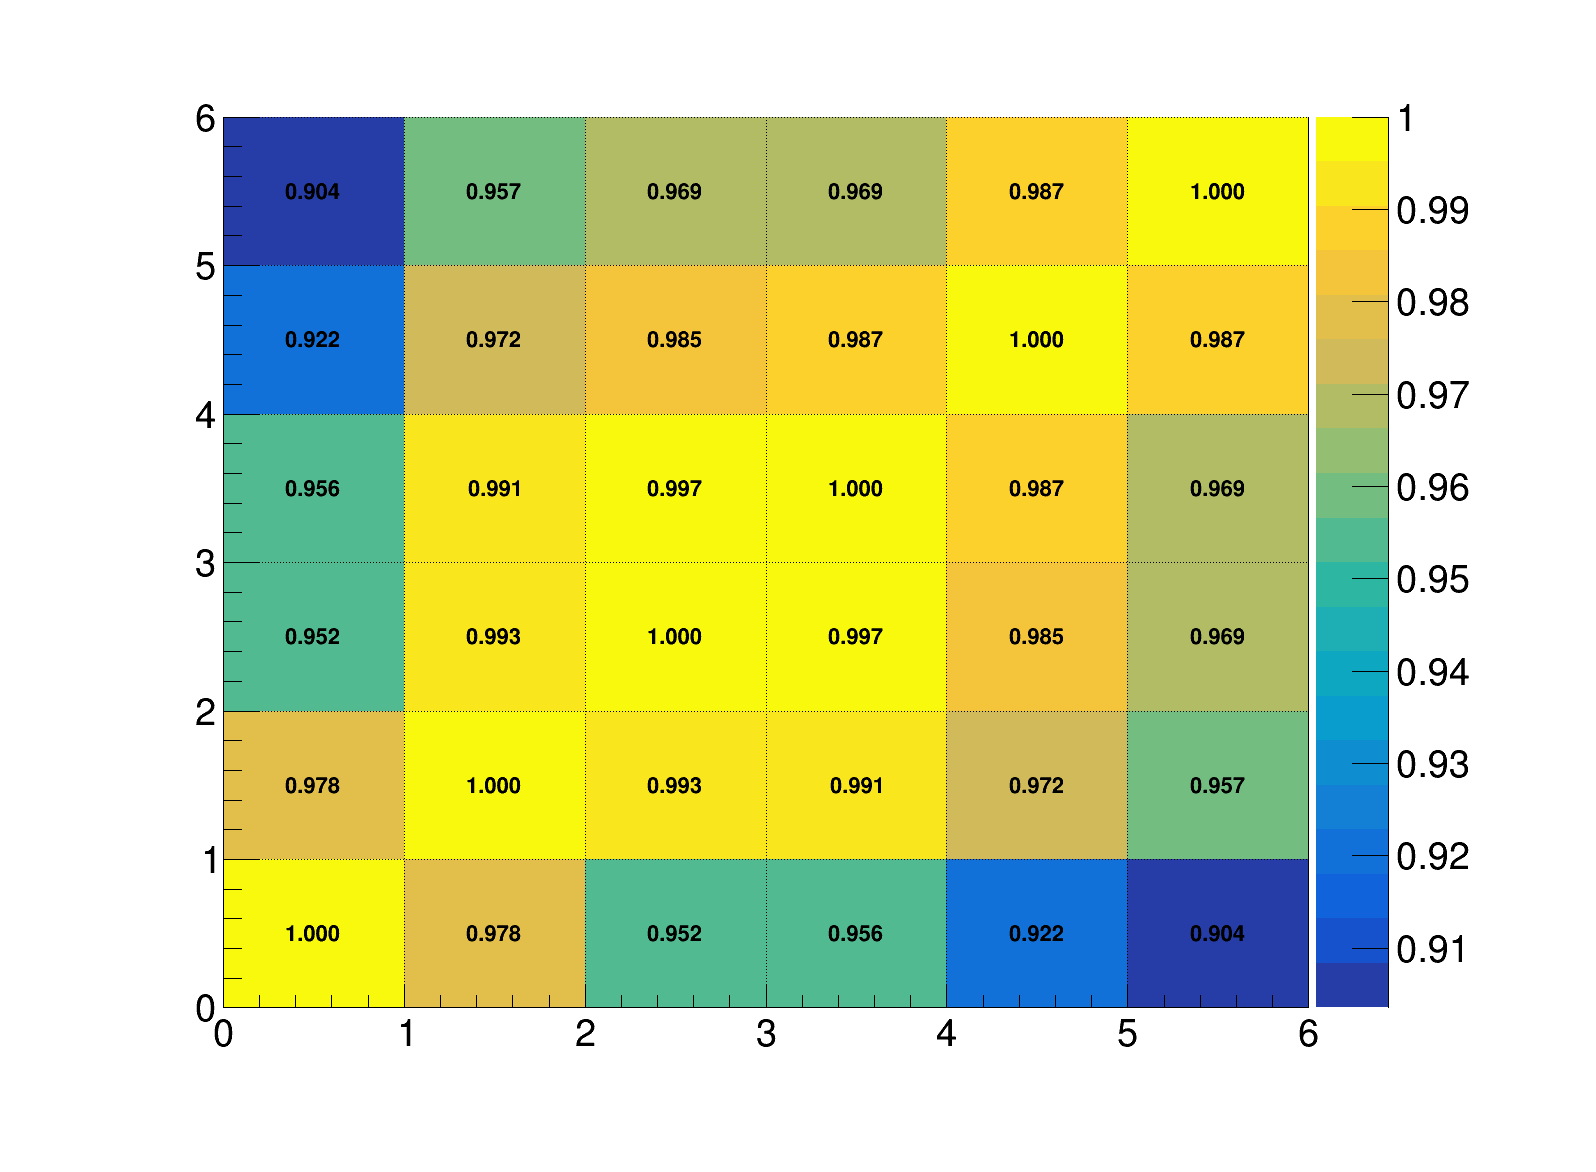

In [32]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_genie_all.png")
c1.SaveAs(outputdir_root + "h_correlation_genie_all.root")

In [33]:
# close the root file with all the histos
RootFile.Close()